<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 151.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
# Extract historical stock data for Tesla and save it in a DataFrame
tesla_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
import yfinance as yf

# Question 1: Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data with maximum available period
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
import requests

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the response text into a variable
html_data = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [11]:
import pandas as pd

# 1. Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 2. Find all tbody elements (tables bodies)
tbody_elements = soup.find_all("tbody")

# 3. Locate the Tesla Quarterly Revenue table (usually the second tbody)
table = tbody_elements[1]

# 4. Iterate through each row in the table body
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        # 5. Extract date and revenue text
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # 6. Append the data to the DataFrame
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Optional: Show the first few rows
print(tesla_revenue.head())


AttributeError: 'DataFrame' object has no attribute 'append'

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
# Display the last 5 rows of tesla_revenue
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
import yfinance as yf

# Create a ticker object for GameStop
gamestop = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [16]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GME
gme = yf.Ticker("GME")

# Extract historical stock information for the maximum available time
gme_data = gme.history(period="max")

# Display the first few rows of the DataFrame to verify
print(gme_data.head())

# Display information about the DataFrame (e.g., columns, data types)
print(gme_data.info())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5884 entries, 2002-02-

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [17]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GME
gme = yf.Ticker("GME")

# Extract historical stock information for the maximum available time
gme_data = gme.history(period="max")

# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [18]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and save the response
response = requests.get(url)

# Extract the text content from the response
html_data_2 = response.text

# You can optionally print the first 500 characters to verify
print(html_data_2[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [19]:
from bs4 import BeautifulSoup
import requests

# Assuming html_data_2 contains the HTML content from the previous step
# If you ran the previous code, html_data_2 should already be available.
# If not, let's re-download it for completeness:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

# You can now print the prettified HTML to see the parsed structure (optional)
# print(soup.prettify()[:1000]) # Print first 1000 characters of prettified HTML

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing GameStop Revenue (using the provided index)
table = soup.find_all("tbody")[1]

# Extract data from the table
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

# Create the DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean the Revenue column (remove commas and dollar signs)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\\$,]', '', regex=True)

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing GameStop Revenue (using the provided index)
table = soup.find_all("tbody")[1]

# Extract data from the table
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

# Create the DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Clean the Revenue column (remove commas and dollar signs)
# Ensure the column is treated as strings before using .str.replace
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(r'[\\$,]', '', regex=True)

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


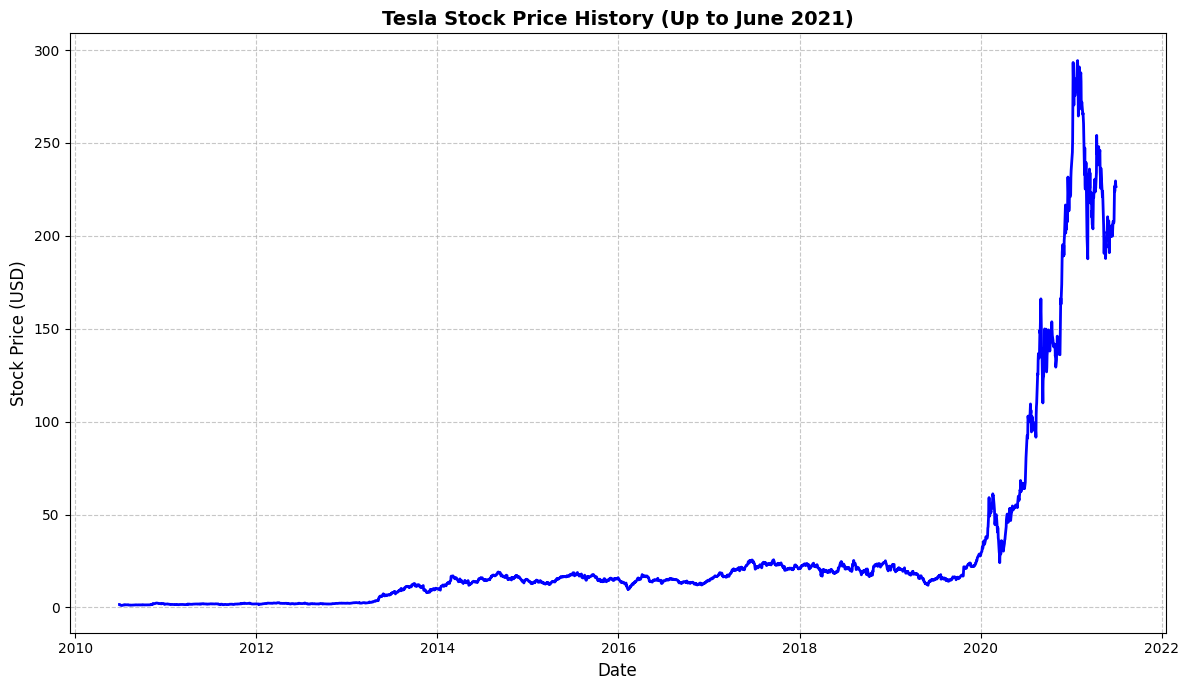

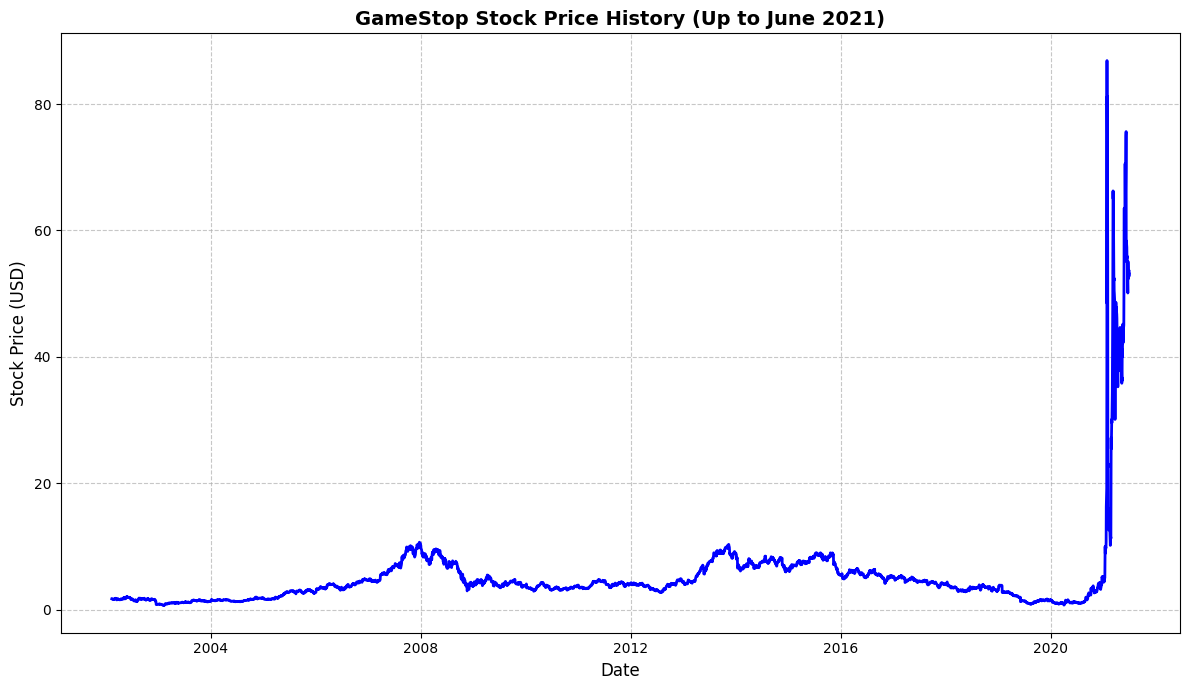

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Define the make_graph function
def make_graph(stock_df, revenue_df, title):
    """
    Generates a line plot for stock data.

    Args:
        stock_df (pd.DataFrame): The DataFrame containing stock data with 'Date' and 'Close' columns.
        revenue_df (pd.DataFrame): The DataFrame containing revenue data (not used for this specific plot).
        title (str): The title of the graph.
    """
    plt.figure(figsize=(12, 7))
    plt.plot(stock_df['Date'], stock_df['Close'], color='blue', linewidth=2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.title(title + " Stock Price History (Up to June 2021)", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- 1. Get Tesla Stock Data and Plot ---

# Create a ticker object for Tesla (TSLA)
tsla = yf.Ticker("TSLA")

# Extract historical stock information for the maximum available time
tsla_data = tsla.history(period="max")

# Reset the index of the tsla_data DataFrame
tsla_data.reset_index(inplace=True)

# Convert 'Date' column to datetime objects
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

# Filter data up to June 2021
tsla_data_filtered = tsla_data[tsla_data['Date'] <= '2021-06-30']

# Dummy revenue data for function call signature (not used in plot)
tsla_revenue = pd.DataFrame(columns=['Date', 'Revenue']) # Placeholder

# Plot Tesla Stock Graph
make_graph(tsla_data_filtered, tsla_revenue, 'Tesla')


# --- 2. Get GameStop Stock Data and Plot ---

# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical stock information for the maximum available time
gme_data = gme.history(period="max")

# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Convert 'Date' column to datetime objects
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Fetch GameStop revenue data as previously done to match make_graph signature
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme = requests.get(url_gme_revenue)
soup_gme = BeautifulSoup(response_gme.text, 'html.parser')
table_gme_revenue = soup_gme.find_all("tbody")[1]

data_gme_revenue = []
for row in table_gme_revenue.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data_gme_revenue.append([date, revenue])

gme_revenue = pd.DataFrame(data_gme_revenue, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(r'[\\$,]', '', regex=True)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']) # Ensure Date is datetime for consistency

# Plot GameStop Stock Graph
make_graph(gme_data_filtered, gme_revenue, 'GameStop')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


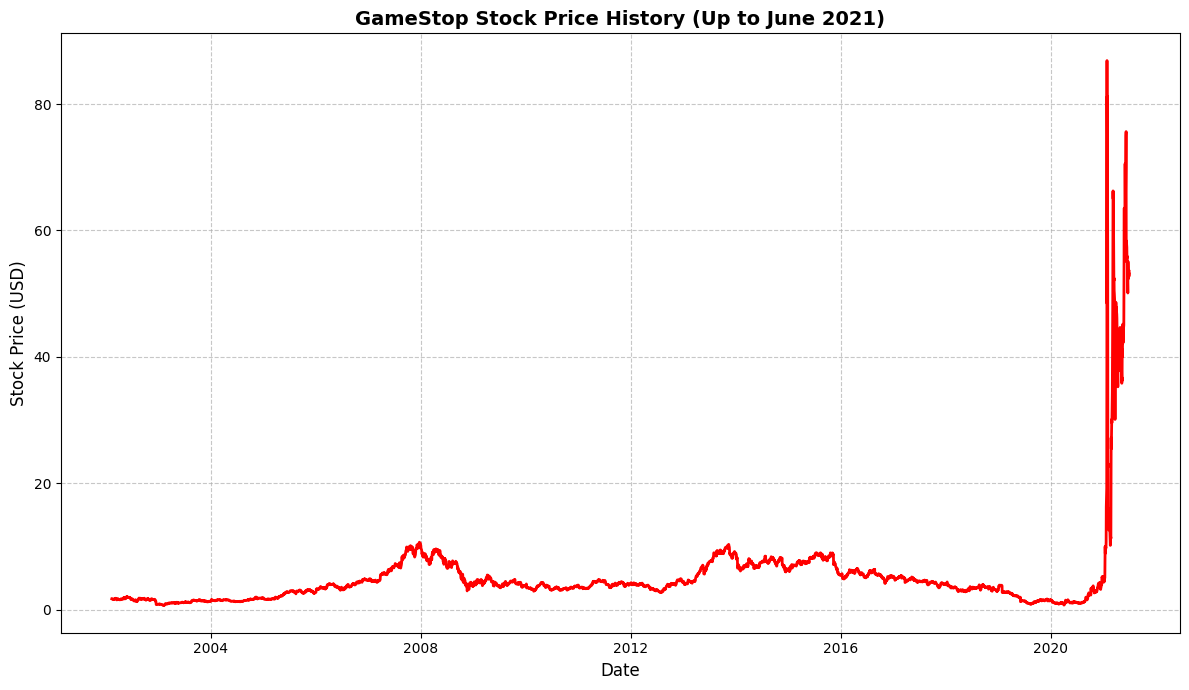

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Define the make_graph function
def make_graph(stock_df, revenue_df, title):
    """
    Generates a line plot for stock data.

    Args:
        stock_df (pd.DataFrame): The DataFrame containing stock data with 'Date' and 'Close' columns.
        revenue_df (pd.DataFrame): The DataFrame containing revenue data (not used for this specific plot).
        title (str): The title of the graph.
    """
    plt.figure(figsize=(12, 7))
    plt.plot(stock_df['Date'], stock_df['Close'], color='red', linewidth=2) # Changed color for GameStop
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.title(title + " Stock Price History (Up to June 2021)", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Get GameStop Stock Data ---
# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical stock information for the maximum available time
gme_data = gme.history(period="max")

# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Convert 'Date' column to datetime objects
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# --- Get GameStop Revenue Data ---
# URL of the webpage containing GameStop revenue
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme = requests.get(url_gme_revenue)
soup_gme = BeautifulSoup(response_gme.text, 'html.parser')
table_gme_revenue = soup_gme.find_all("tbody")[1]

data_gme_revenue = []
for row in table_gme_revenue.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data_gme_revenue.append([date, revenue])

gme_revenue = pd.DataFrame(data_gme_revenue, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(r'[\\$,]', '', regex=True)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']) # Ensure Date is datetime for consistency
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce') # Convert Revenue to numeric, coercing errors

# --- Plot GameStop Stock Graph ---
make_graph(gme_data_filtered, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
